## Logistic Regression
Logistic Regression in one of the machine learning algorithm to solve **binary classification** problem. <br> By classification we mean when dependent variable is in **categorical** form. Some real life classification example would be
* to classify the mail as spam or not spam
* to classify the transaction as fraudulent or genuine
* whether a person will buy insurance or not <br>
In the above examples Logistic Regression estimates the **probability** of an event occurring i.e either mail is spam **(1)** or not spam **(0)**.





## Mathematics behind logistic regression
Suppose we have a dataset of whether a person will buy insurance or not. In the dependent variable(bought_insurance), **1** means *he will buy insurance* i.e a *positive class* and **0** means *he will not buy insurance* i.e a *negative class*. 


In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("insurance_data.csv")
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


If we plot this dataset, we can see that all the points lie on 0 and 1

Text(0, 0.5, 'insurance ?: 0=No and 1=Yes')

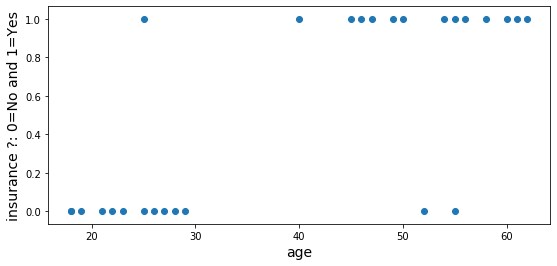

In [3]:
plt.figure(figsize= (9,4))
plt.scatter(data["age"], data['bought_insurance'])
plt.xlabel("age", fontsize=14)
plt.ylabel("insurance ?: 0=No and 1=Yes", fontsize=14)

Seeing the plot we find that there is nothing special about the dependent variable aside from being binary. So we use Linear Regression by assuming the threshold value as 0.5. Which means that if the **probability(yes) >= 0.5**, the person will buy the insurance and if  **probability(yes) < 0.5**, the person will not buy the insurance.

In [4]:
# separating independent and dependent variable
x= data[["age"]]
y= data[["bought_insurance"]]

# defining Linear Regression model
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

# fitting the model
reg.fit(x,y)

LinearRegression()

intercept : [-0.42094437]
coefficient : [[0.02368394]]


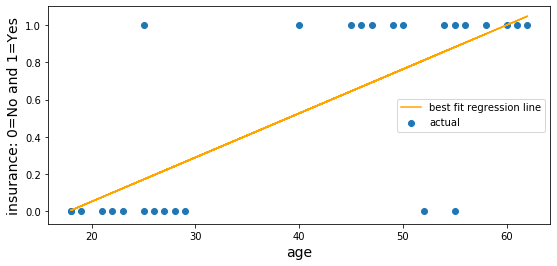

In [5]:
plt.figure(figsize= (9,4))
plt.scatter(data["age"], data['bought_insurance'])
plt.plot(data["age"], reg.predict(x), color="orange")
plt.xlabel("age", fontsize=14)
plt.ylabel("insurance: 0=No and 1=Yes", fontsize=14)
plt.legend([ "best fit regression line", "actual"])

print("intercept :", reg.intercept_)
print("coefficient :", reg.coef_)

## Problem in using Linear Regression
### Problem 1.
On the best fit line if we try to find whether the person with age=15 and age=75 will buy the insurance or not, we are getting the probability as negative and greater than 1 respectively.<br> And since the probability always lie between 0 and 1, it can never be negative or >1, Linear Regression cannot be used here.

In [6]:
print("probability(yes=15) is" , reg.predict([[15]]))
print("probability(yes=75) is" , reg.predict([[75]]))

probability(yes=15) is [[-0.06568529]]
probability(yes=75) is [[1.35535101]]


### Problem 2.
In case the dataset contains outliers.

In [7]:
# creating same dataset with outlier
data.to_csv("insurance_data(with_outlier).csv", index=False)

In [8]:
# to create an outlier, I have added a data point for age=120 and 1 as the corresponding output
import csv

with open("insurance_data(with_outlier).csv", "a") as csvfile:
    writer= csv.writer(csvfile)
    writer.writerow([120,1])  

In [9]:
data2= pd.read_csv("insurance_data(with_outlier).csv")
data2.tail()

,age,bought_insurance
23,45,1
24,50,1
25,54,1
26,23,0
27,120,1


In [10]:
# fitting linear regression model on the new dataset with outlier
reg2= LinearRegression()
reg2.fit(data2[["age"]], data2[["bought_insurance"]])

LinearRegression()

intercept : [-0.10208581]
coefficient : [[0.01499446]]


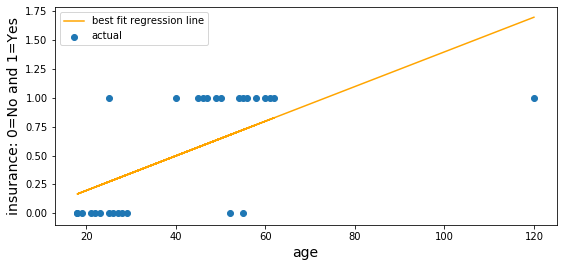

In [11]:
plt.figure(figsize= (9,4))
plt.scatter(data2[["age"]], data2[["bought_insurance"]])
plt.plot(data2[["age"]], reg2.predict(data2[["age"]]), color="orange")
plt.xlabel("age", fontsize=14)
plt.ylabel("insurance: 0=No and 1=Yes", fontsize=14)
plt.legend([ "best fit regression line", "actual"])

print("intercept :", reg2.intercept_)
print("coefficient :", reg2.coef_)

From the plot we can see that because of the outlier, both the ***intercept*** and the ***coefficient*** is changed resulting in the ***shift of regression line***.<br> Now some datapoints which were in *positive class* (probability(yes)>= 0.5) comes in *negative class* (probability(yes)< 0.5), giving the incorrect prediction.

In [12]:
print("probability(yes=40) without outlier was {}. This person was buying the insurance.".format(reg.predict([[40]])))
print("probability(yes=40) with outlier is {}. Now this person will not buy the insurance.".format(reg2.predict([[40]])))

probability(yes=40) without outlier was [[0.52641316]]. This person was buying the insurance.
probability(yes=40) with outlier is [[0.49769262]]. Now this person will not buy the insurance.


###### In short:
probability (p)= f(x), a linear function where x is an independent variables.<br> But we need to constrain probability (p) such that 0<= p <=1.


## Solving the above problems of using Linear Regression
Let’s consider y as linear function in the above univariate regression model, where x = independent variable and y = dependent variable.
$${y} = {\beta}_{0} + {\beta}_{1}x $$ 

$${probability (p)} = f(x) = {\beta}_{0} + {\beta}_{1}x $$ 
###### To make probability(p) >= 0
The exponential of any number always gives the positive value. Now the probability (p) becomes

$${p} = e^{f(x)} = e^{ {\beta}_{0} + {\beta}_{1}x } $$ 
###### To make probability(p) < 1
Dividing any number by a number which is slightly greater than it gives a value less than 1. Now the probability (p) becomes

$${p} = \frac{ e^{f(x)}}  {1 + e^{f(x)} }   = \frac{ e^{ {\beta}_{0} + {\beta}_{1}x } }  {1 + e^{ {\beta}_{0} + {\beta}_{1}x }  }$$ 

$$ or $$

$${p} = \frac{1}  {1 + e^{- ({\beta}_{0} + {\beta}_{1}x) }  }$$

$$ Sigmoid Function $$

***This Sigmoid Function will also take care of Outliers***
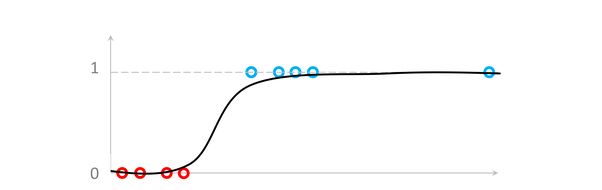

On solving the Sigmoid Function we get
$$\frac{p}{1-p} = e^{ {\beta}_{0} + {\beta}_{1}x }$$

$$ log(\frac{p}{1-p}) = {\beta}_{0} + {\beta}_{1}x $$

$$ log(odds) = {\beta}_{0} + {\beta}_{1}x $$, here p / (1-p) = probability of odds

$$logit (p) = {\beta}_{0} + {\beta}_{1}x$$
**log([odds](https://www.youtube.com/watch?v=ARfXDSkQf1Y)) = logit transformation of probability**

### The *logit* of *probability* gives the linear regression and hence the name LOGISTIC REGRESSION